In [1]:
import keras

Using TensorFlow backend.


In [2]:
train_dir = 'D:/projects/digit recognizer + solver/extracted_images'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
classes = ['0','1','2','3','4','5','6','7','8','9','+','-','times','(',')']
print(len(classes))

16


In [5]:

import keras
keras.backend.set_image_data_format('channels_first')

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  data_format = 'channels_first',
                                  validation_split =0.2)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(28,28),
                                                   color_mode = 'grayscale',
                                                   batch_size=20,
                                                   shuffle = True,
                                                   classes = classes,
                                                   class_mode = 'sparse',
                                                   subset = 'training')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(28,28),
                                                        color_mode = 'grayscale',
                                                        batch_size=20,
                                                        shuffle= True,
                                                        classes = classes,
                                                        class_mode = 'sparse',
                                                        subset = 'validation')


Found 148914 images belonging to 16 classes.
Found 37220 images belonging to 16 classes.


In [7]:
from keras.layers import merge,Input,concatenate
from keras.models import Model
from keras.layers.core import Dense,Dropout,Flatten
from keras.layers.convolutional import MaxPooling2D,Convolution2D
img_rows,img_cols = 28,28
nb_filters_1 = 64
nb_filters_2 = 128
nb_filters_3 = 256
nb_conv = 3
nb_conv_mid = 4
nb_conv_init = 5
init = Input(shape=(1,28,28),)


In [8]:
fork11 = Convolution2D(nb_filters_1,nb_conv_init,activation='relu',border_mode='same')(init)
fork12 = Convolution2D(nb_filters_1,nb_conv_init,nb_conv_init,activation='relu',border_mode='same')(init)
merge1 = concatenate([fork11,fork12],axis=1,name='merge1')
maxpool1 = MaxPooling2D(strides=(2,2),border_mode = 'same')(merge1)

fork21 = Convolution2D(nb_filters_2,nb_conv_mid,nb_conv_mid,activation='relu',
                      border_mode ='same')(maxpool1)
fork22 = Convolution2D(nb_filters_2,nb_conv_mid,nb_conv_mid,activation='relu',border_mode='same')(maxpool1)

merge2 = concatenate([fork21,fork22],axis=1,name='merge2')

maxpool2 = MaxPooling2D(strides=(2,2),border_mode='same')(merge2)

fork31 = Convolution2D(nb_filters_3,nb_conv,nb_conv,activation='relu',border_mode='same')(maxpool2)

fork32 = Convolution2D(nb_filters_3,nb_conv,nb_conv,activation='relu',border_mode='same')(maxpool2)

fork33 = Convolution2D(nb_filters_3,nb_conv,nb_conv,activation='relu',border_mode='same')(maxpool2)

fork34 = Convolution2D(nb_filters_3,nb_conv,nb_conv,activation='relu',border_mode='same')(maxpool2)

fork35 = Convolution2D(nb_filters_3,nb_conv,nb_conv,activation='relu',border_mode='same')(maxpool2)


fork36 = Convolution2D(nb_filters_3,nb_conv,nb_conv,activation='relu',border_mode='same')(maxpool2)

merge3 = concatenate([fork31,fork32,fork33,fork34,fork35,fork36],axis=1,name='merge3')

maxpool3 = MaxPooling2D(strides = (2,2),border_mode='same')(merge3)

dropout = Dropout(0.5)(maxpool3)

flatten = Flatten()(dropout)

output = Dense(15,activation='softmax')(flatten)


model = Model(input=init,output=output)

model.summary()

C:\Users\naray\Anaconda3\envs\mirai_1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 5, activation="relu", padding="same")`
  """Entry point for launching an IPython kernel.
C:\Users\naray\Anaconda3\envs\mirai_1\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", padding="same")`
  
C:\Users\naray\Anaconda3\envs\mirai_1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(strides=(2, 2), padding="same")`
  after removing the cwd from sys.path.
C:\Users\naray\Anaconda3\envs\mirai_1\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  import sys
C:\Users\naray\Anaconda3\envs\mirai_1\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` ca

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 28, 28)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 28, 28)   1664        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 28, 28)   1664        input_1[0][0]                    
__________________________________________________________________________________________________
merge1 (Concatenate)            (None, 128, 28, 28)  0           conv2d_1[0][0]                   
                                                                 conv2d_2[0][0]             

C:\Users\naray\Anaconda3\envs\mirai_1\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [9]:
from keras import optimizers 
ada = keras.optimizers.Adadelta(learning_rate=1.0,rho=0.95)
model.compile(optimizer=ada,loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit_generator(train_generator,validation_data=validation_generator,
                             steps_per_epoch=100,
                             validation_steps=100,
                             epochs=15)

Epoch 1/15
100/100 [==============================] - 281s 3s/step - loss: 1.7158 - accuracy: 0.4675 - val_loss: 0.6694 - val_accuracy: 0.7660
Epoch 2/15
100/100 [==============================] - 256s 3s/step - loss: 0.6464 - accuracy: 0.8080 - val_loss: 0.6671 - val_accuracy: 0.8780
Epoch 3/15
100/100 [==============================] - 239s 2s/step - loss: 0.4170 - accuracy: 0.8785 - val_loss: 0.5416 - val_accuracy: 0.6635
Epoch 4/15
100/100 [==============================] - 216s 2s/step - loss: 0.3865 - accuracy: 0.8910 - val_loss: 0.4434 - val_accuracy: 0.9085
Epoch 5/15
100/100 [==============================] - 203s 2s/step - loss: 0.3236 - accuracy: 0.9080 - val_loss: 0.4141 - val_accuracy: 0.8645
Epoch 6/15
100/100 [==============================] - 209s 2s/step - loss: 0.2573 - accuracy: 0.9240 - val_loss: 0.4155 - val_accuracy: 0.9175
Epoch 7/15
100/100 [==============================] - 215s 2s/step - loss: 0.2471 - accuracy: 0.9225 - val_loss: 0.6937 - val_accuracy: 0.9260

In [10]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [11]:
import matplotlib.pyplot as plt

In [12]:
print(accuracy,val_accuracy)

[0.4675, 0.808, 0.8785, 0.891, 0.908, 0.924, 0.9225, 0.935, 0.9325, 0.927, 0.938, 0.9465, 0.9395, 0.9345, 0.9275] [0.765999972820282, 0.878000020980835, 0.6635000109672546, 0.9085000157356262, 0.8644999861717224, 0.9175000190734863, 0.9259999990463257, 0.9319999814033508, 0.9455000162124634, 0.9304999709129333, 0.9434999823570251, 0.925000011920929, 0.9559999704360962, 0.9465000033378601, 0.9474999904632568]


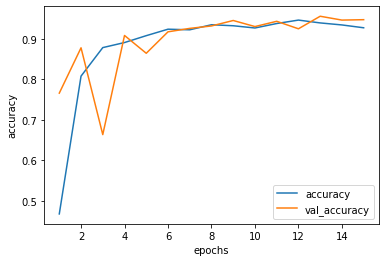

In [14]:
plt.plot(range(1,15+1),accuracy)
plt.plot(range(1,15+1),val_accuracy)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [15]:
model.save('DCNN-11.h5')